In [4]:
# load libraries
import scipy.sparse as sp
import cplex as cp
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
def mixed_integer_linear_programming(direction, A, senses, b, c, l, u, types):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist(), types = types.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(), col_indices.tolist(), A.data.tolist()))

    print(prob.write_as_string())
        
    # solve the problem
    prob.solve()

    # check the solution status
    # print(prob.solution.get_status())
    # print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

[['x' 'x' 'x' 'x' 'x' 'x' 'x' 'y']
 ['b' 'x' 'x' 'x' 'x' 'x' 'y' 'y']
 ['b' 'b' 'g' 'x' 'x' 'x' 'u' 'y']
 ['b' 'r' 'g' 'g' 'x' 'u' 'u' 'u']
 ['r' 'r' 'g' 'x' 'x' 'x' 'x' 'x']
 ['x' 'r' 'x' 'x' 'p' 'x' 'x' 'a']
 ['x' 'x' 'x' 'p' 'p' 'p' 'a' 'a']
 ['x' 'x' 'x' 'x' 'x' 'x' 'x' 'a']]


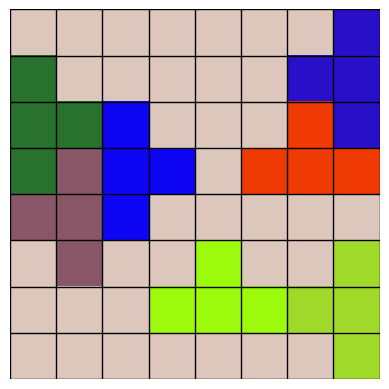

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 obj1: x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14
       + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26
       + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38
       + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50
       + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x60 + x61 + x62
       + x63 + x64
Subject To
 c1:  x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8  = 1
 c2:  x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16  = 1
 c3:  x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24  = 1
 c4:  x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32  = 1
 c5:  x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40  = 1
 c6:  x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48  = 1
 c7:  x49 + x50 + x51 + x52 + x53 + x54 + x55 + x56  = 1
 c8:  x57 + x58 + x59 + x60 + x61 + x62 + x63 + x64  = 1
 c9:  x1 + x9 + x17 + x25 + x33 + x41 + x49 + x57  = 1
 c10: x2 + x10 + x18 + x2

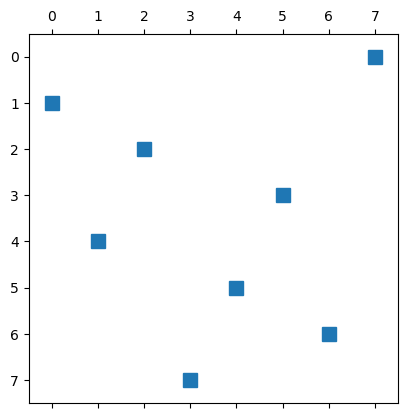

In [13]:
# Load the board from the file as a list of strings
with open('board2.txt', 'r') as file:
    board = [line.strip().split() for line in file.readlines()]
# Convert the board to a NumPy array
board_array = np.array(board)

print(board_array)

# Initialize the color board with dimensions based on the loaded board
color_board = np.zeros((board_array.shape[0], board_array.shape[1], 3), dtype=np.uint8)

# Get unique letters in the board
unique_letters = np.unique(board_array)

# Function to generate a random color
def random_color():
    return [random.randint(0, 255) for _ in range(3)]

# Create a mapping for unique letters to random colors
rgb_map = {letter: random_color() for letter in unique_letters}

# Fill the color board using the rgb_map
for i in range(board_array.shape[0]):
    for j in range(board_array.shape[1]):
        color_board[i, j] = rgb_map[board_array[i, j]]

# Display the color board
plt.imshow(color_board)
plt.axis('off')  # Turn off axis labels

# Add grid lines
for x in range(color_board.shape[1] + 1):
    plt.axvline(x - 0.5, color='black', linewidth=1)
for y in range(color_board.shape[0] + 1):
    plt.axhline(y - 0.5, color='black', linewidth=1)

# Show the plot
plt.show()
N= board_array.shape[0]

# direction, A, senses, b, c, l, u, types

direction = 'maximize'
c = np.repeat(1 , N*N)
types = np.repeat('B' , N*N)
l = np.repeat(0,N*N)
u = np.repeat(1,N*N)


aij = np.repeat(1.0, 2 * N * N)
row = np.repeat(range(2 * N), N)
col = np.concatenate((range(N * N), 
                          np.array(range(N * N)).reshape(N, N).T.flatten()))

A = sp.csr_matrix((aij, (row, col)), shape = (2 * N, N * N))
# plt.figure(figsize = (24, 18))
# plt.spy(A, marker = "o")
# plt.show()

A_dense = A.toarray()

flat_board = np.array(board).flatten()
for i in np.unique(flat_board):
    new_const = ((flat_board==i).astype(int))
    A_dense = np.vstack((A_dense , new_const))
A = sp.csr_matrix(A_dense)


for i in range(N):
    for j in range(N):
        
        const = np.repeat(0, N*N)
        const[i*(N) + j ] = 1
        #diagonals
        
        if (i+1 < N) and ((j-1) >= 0):
            # print((i*N + j) , "lower left diagonal is" ,  ((i+1)*N + j-1) , "position equals", i+1,j-1)
            const[(i+1)*N + j-1] = 1
        if (i+1 < N) and ((j+1) < N):
            # print((i*N + j) , "lower right diagonal is" ,  ((i+1)*N + j+1) , "position equals", i+1,j+1)
            const[(i+1)*N + j+1] = 1
        if (i-1 >= 0) and ((j-1) >= 0):
            # print((i*N + j) , "upper left diagonal is" ,  ((i-1)*N + j-1) , "position equals", i-1,j-1)         
            const[(i-1)*N + j-1] = 1
        if (i-1 >= 0 ) and ((j+1) < N):
            # print((i*N + j) , "upper right diagonal is" ,  ((i-1)*N + j+1) , "position equals", i-1,j+1)
            const[(i-1)*N + j+1] = 1
        
      
        
        A_dense = np.vstack((A_dense, const))
        
A= sp.csr_matrix(A_dense)
mm = A_dense.shape[0]
b = np.repeat(1,mm)
senses = np.concatenate(((np.repeat('E',N+N)) , np.repeat('L',mm-N-N)))


x_star, obj_star = mixed_integer_linear_programming(direction, A, senses, b, c, l, u, types)
X_star = np.array(x_star).reshape(N,N)
XX_star = sp.csr_matrix(X_star)
# Plot using spy
plt.spy(XX_star, markersize=10)

# Set x and y axis ticks starting at 1
# Loop over the matrix and replace dots with queens
plt.show()